DIP ASSIGNMENT 1 </BR>
Q2.2 </BR>
(ZIYAAD BALLIM - 1828251)

2.2 - Using notch filtering to remove moire patterns from a grayscale image

In [5]:
import numpy as np
np.set_printoptions(suppress=True)
from scipy import misc
from scipy.ndimage import convolve
import cv2
from collections import Counter
import scipy.fftpack as fp
from skimage.exposure import match_histograms
from skimage import io
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings("ignore")

In [6]:
def GetFourier(im):
    FSpectrum=np.fft.fftshift(np.fft.fft2(im).astype(float))
    return FSpectrum

In [7]:
def ButterWorthNotch(M,N,D0=9,u_k=0,v_k=0):
    Filter=np.zeros((M,N),dtype=float)
    for u in range(0,M):
        for v in range(0,N):
            D_UV=np.sqrt((u-M/2+u_k)**2 + (v-N/2+v_k)**2)
            D_MUV=np.sqrt((u-M/2-u_k)**2 + (v-N/2-v_k)**2)
            if D_UV<=D0 or D_MUV<=D0:
                Filter[u,v]=0.0
            else:
                Filter[u,v]=1.0
    return Filter

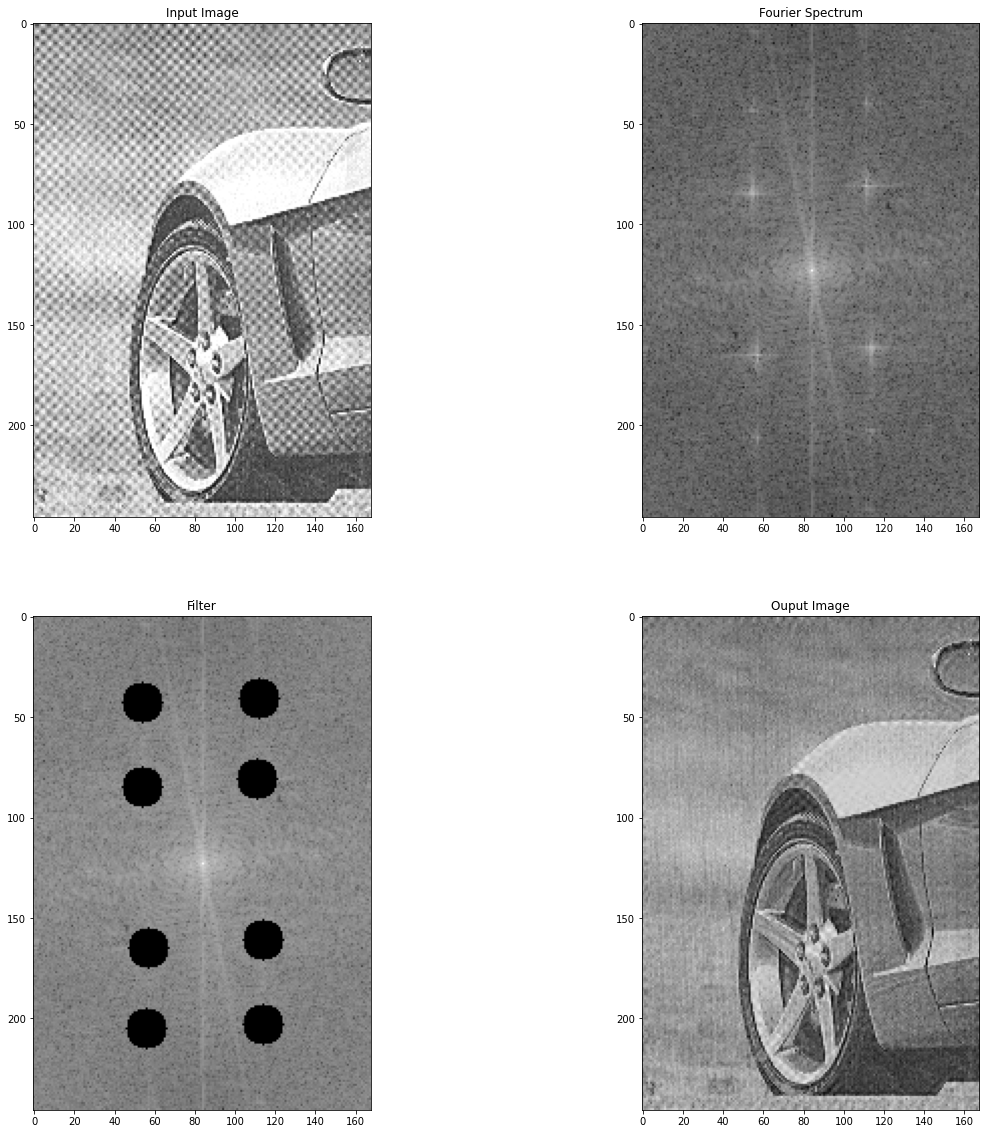

In [8]:
car=io.imread("images/car_75DPI_Moire.tif")
f = np.fft.fft2(car)
ft = np.fft.fftshift(f)
Phase_SpectrumR=np.angle(ft)
Mag_Spectrum=20*np.log(np.abs(ft))

Row,Col=car.shape
Filter1=ButterWorthNotch(Row,Col,10,38,30)
Filter2 =ButterWorthNotch(Row,Col, 10, -42, 27)
Filter3 =ButterWorthNotch(Row,Col, 10, 80, 30)
Filter4 =ButterWorthNotch(Row,Col, 10, -82, 28)
NotchFilter=Filter1*Filter2*Filter3*Filter4
NotchCentreReject=ft*NotchFilter
NotchReject=np.fft.ifftshift(NotchCentreReject)
inv_NotchReject=np.fft.ifft2(NotchReject)

Result=np.abs(inv_NotchReject)

# filter=ButterWorthNotch(Row,Col,9,5)
# Multfilter=filter*ft

fig,ax = plt.subplots(nrows = 2,ncols=2,figsize = (20,20))
plt.figure
plt.subplot(2,2,1)
plt.title("Input Image")
plt.imshow(car,cmap="gray")
plt.subplot(2,2,2)
plt.title("Fourier Spectrum")
plt.imshow(Mag_Spectrum,cmap="gray")
plt.subplot(2,2,3)
plt.title("Filter")
plt.imshow(Mag_Spectrum*NotchFilter,cmap="gray")
plt.subplot(2,2,4)
plt.title("Ouput Image")
plt.imshow(Result,cmap="gray")